In [140]:
#libraries
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt #no
from tqdm import tqdm
from scipy.special import expit

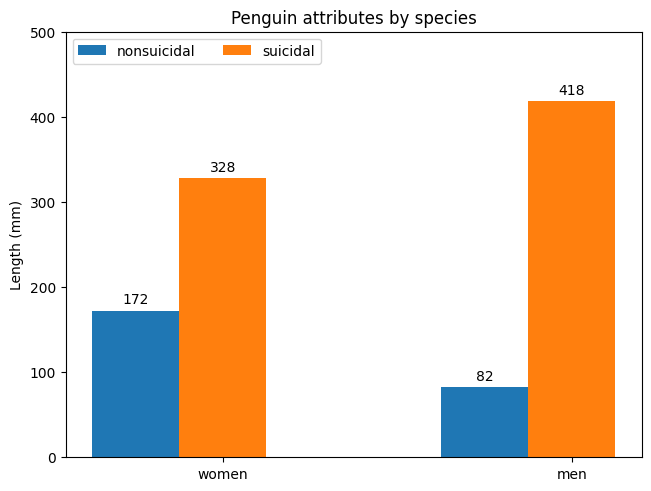

(     input  output
 0        0       1
 1        0       0
 2        0       1
 3        0       1
 4        0       1
 ..     ...     ...
 995      1       1
 996      1       1
 997      1       0
 998      1       1
 999      1       1
 
 [1000 rows x 2 columns],
   gender  non suicidal  suicidal
 0  women           172       328
 1    men            82       418)

In [186]:
#calculate probability
def sigmoid(a, b, input_x):
    prob = np.exp(a+b*input_x)
    probability = prob/(1+prob)
    return probability

#decison making
def decision(P): 
    x = random.rand(1)
    if x < P:
        outcome = 1
    else:
        outcome = 0
    return outcome

#simulate data
def simulate(a, b, n_samples):
    np.random.seed(0)

    output = []
    input_a = []
    zerosw = 0
    zerosm = 0
    onesw = 0
    onesm = 0
    
    #obtain the output of a random input
    for i in range(1, n_samples + 1):
        if i <= n_samples/2:
            input_x = 0
            real = 'woman'
        else:
            input_x = 1
            real = 'man'
        output_y = decision(sigmoid(a, b, input_x))
        
        #store the results
        if input_x == 0 and output_y == 0:
            zerosw = zerosw + 1
        if input_x == 0 and output_y == 1:
            onesw = onesw + 1
        if input_x == 1 and output_y == 0:
            zerosm = zerosm + 1
        if input_x == 1 and output_y == 1:
            onesm = onesm + 1
        
        input_a.append(input_x)
        output.append(output_y)
    #build the datasets
    dataset = pd.DataFrame({'input': input_a, 'output': output})
    dataset.to_csv('dataset.csv', index=False)
    dataproportion = pd.DataFrame({'gender': ['women', 'men'], 'non suicidal': 
                                   [zerosw, zerosm], 'suicidal': [onesw, onesm]})
    dataplot = pd.DataFrame({'nonsuicidal': [zerosw, zerosm], 'suicidal': [onesw, onesm]})
    
    #plot
    x = np.arange(len(dataproportion['gender']))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in dataplot.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, dataproportion['gender'])
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 500)
    plt.show()

    return dataset, dataproportion

simulate(0.6, 1.2, 1000)